# Part II : OLMAR 

Part II aims to show how OLMAR performs on financial dataset comparing to commonly used portfolio selection algorithms. 

OLMAR is a portfolio selection algorithm designed by B.Li and S.Hoi in the article [On-Line Portfolio Selection with Moving Average Reversion](http://arxiv.org/abs/1206.4626).

#### Initialization

In [32]:
%matplotlib inline

import pandas as pd
from universal import tools
from universal import algos
import logging

# we would like to see algos progress
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.DEBUG)

import matplotlib
import seaborn
# increase the size of graphs
matplotlib.rcParams['savefig.dpi'] *= 1.5
import matplotlib.pyplot as plt

# remove warnings
import warnings
warnings.filterwarnings("ignore")

# load data using tools module
data = tools.dataset('djia') #DO NOT USE NYSE (it has the survivorship bias)

## Reimplementation of the results of OLMAR

#### Instanciation

In [33]:
params = { 
    "window" : 5,       
    "epsilon": 10,
}

# Instanciate OLMAR algorithm
olmar = algos.OLMAR(window=params["window"], eps=params["epsilon"])

#### Performances

Summary:
    Profit factor: 1.14
    Sharpe ratio: 0.77
    Information ratio (wrt UCRP): 1.20
    Annualized return: 48.00%
    Annualized volatility: 50.97%
    Longest drawdown: 351 days
    Max drawdown: 36.85%
    Winning days: 53.7%
        


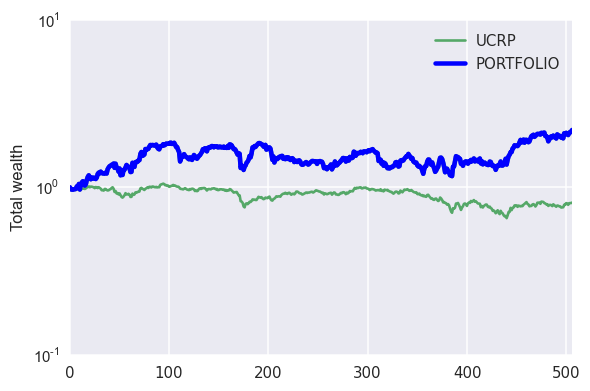

In [34]:
# Compute performances
result_classic = olmar.run(data)

# summary of the performances
print(result_classic.summary())

# Plotting performances against the UCRP baseline with log-scale on y axis
result_classic.plot(weights=False, assets=False, ucrp=True, logy=True)

#### Looking closer Importance of each share of the portfolio

Let see how much each share contribute to the portfolio 

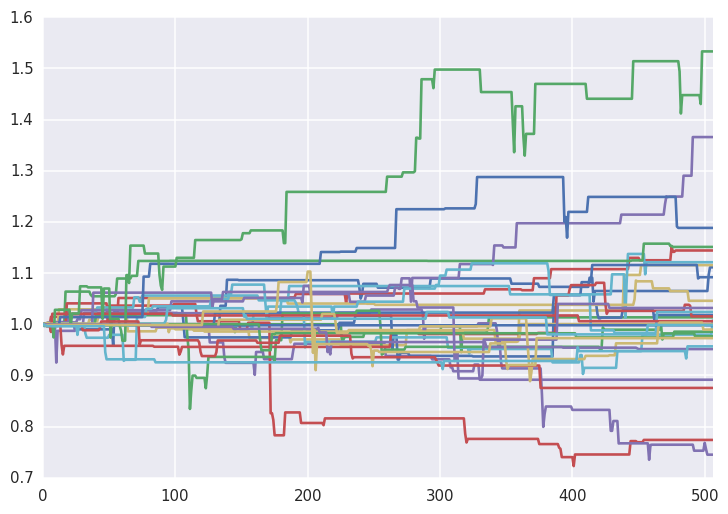

In [31]:
result_classic.plot_decomposition(legend=False, logy=False)

## Comparing to other famous algorithms in portfolios selections

#### Anticor 

*Borodin, A., El-Yaniv, R., & Gogan, V. (2004). Can we learn to beat the best stock. Journal of Artificial Intelligence Research, 21, 579-594. *

#### CWMR

Confidence weighted mean reversion 

*B. Li, S. C. H. Hoi, P.L. Zhao, and V. Gopalkrishnan. Confidence weighted mean reversion strategy for online portfolio selection, 2013. http://jmlr.org/proceedings/papers/v15/li11b/li11b.pdf *

#### PAMR 

Passive agressive mean reversion

*B. Li, P. Zhao, S. C.H. Hoi, and V. Gopalkrishnan. Pamr: Passive aggressive mean reversion strategy for portfolio selection, 2012. http://www.cais.ntu.edu.sg/~chhoi/paper_pdf/PAMR_ML_final.pdf*

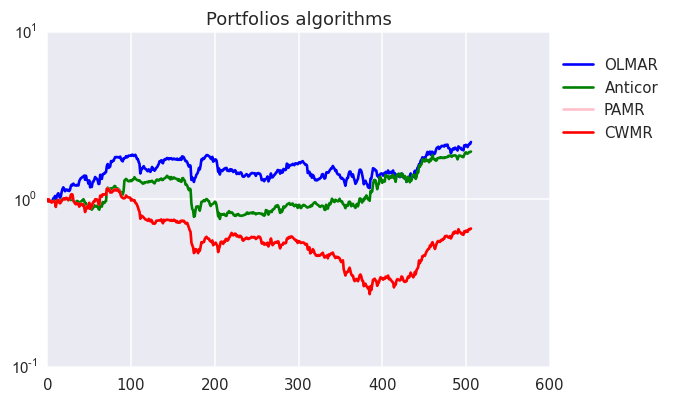

In [39]:
# instanciation
anticor = algos.Anticor()
cwmr = algos.CWMR()
pamr = algos.PAMR()

# computation
result_anticor = anticor.run(data)
result_cwmr = cwmr.run(data)
result_pamr = pamr.run(data)

# visualization
plt.figure()

ax = plt.gca()
ax.set_yscale('log')

plt.plot(result_classic.equity, label ='OLMAR', color='blue' )
plt.plot(result_anticor.equity, label ='Anticor', color='green' )
plt.plot(result_pamr.equity, label ='PAMR', color='pink' )
plt.plot(result_cwmr.equity, label ='CWMR', color='red' )


plt.title("Portfolios algorithms")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()